# Analiza podataka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('handball_stats', index_col='NAME')
df

,CLUB,POSITION,P,G,M,FG,G.1,%,AS,TF,ST,BL,YC,2MIN,RC,BK,HPI
NAME,,,,,,,,,,,,,,,,,
"Mortensen, Casper Ulrich",HSV,LW,28,206,83,137,69,71.28%,9,19,17,0,1,6,0,0,77.0
"Knorr, Juri",RNL,CB,29,178,103,114,64,63.35%,100,80,4,3,1,3,1,0,71.0
"Steinert, Christoph",HCE,RB,30,166,83,81,85,66.67%,42,34,6,5,1,4,0,0,72.0
"Blohme, Lukas",GUM,RW,30,165,69,152,13,70.51%,14,16,11,1,2,8,1,0,74.0
"Smits, Kay",SCM,RB,30,164,65,99,65,71.62%,44,29,4,2,0,5,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Niemann, Max",HSV,CB,5,0,0,0,0,0,0,1,0,0,0,0,0,0,64.0
"Teuteberg, Theodor",GWD,RW,4,0,0,0,0,0,0,0,0,0,0,0,0,0,66.0
"Overby, Silas",BER,LB,5,0,0,0,0,0,1,0,0,0,0,0,0,0,68.0


In [3]:
df.shape

(372, 17)

In [4]:
df.columns

Index(['CLUB', 'POSITION', 'P', 'G', 'M', 'FG', 'G.1', '%', 'AS', 'TF', 'ST',
       'BL', 'YC', '2MIN', 'RC', 'BK', 'HPI'],
      dtype='object')

In [5]:
df=df.rename(columns={'G.1':'PEN'})

In [6]:
df=df.drop(['BK','%'], axis=1)

In [7]:
df.dtypes

CLUB         object
POSITION     object
P             int64
G             int64
M             int64
FG            int64
PEN           int64
AS            int64
TF            int64
ST            int64
BL            int64
YC            int64
2MIN          int64
RC            int64
HPI         float64
dtype: object

Pošto atribut BK nema puno informacija, izbacili smo ga zajedno sa atributom %, koji govori o procentualnom šutu, jer imamo podatke o broju golova i broju promašaja pa ukoliko nam bude trebao, možemo lako da ga kreiramo.

In [8]:
df.describe()

,P,G,M,FG,PEN,AS,TF,ST,BL,YC,2MIN,RC,HPI
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,21.744624,42.147849,25.841398,38.137097,4.010753,16.620968,14.075269,3.032258,2.728495,1.107527,4.849462,0.236559,69.139785
std,9.484949,41.388530,26.505842,35.847536,12.896431,24.521488,16.495028,3.906458,5.509995,1.755775,6.019638,0.594636,3.220023
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
25%,15.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
50%,27.000000,35.000000,17.000000,33.000000,0.000000,5.500000,8.000000,2.000000,0.000000,0.000000,2.000000,0.000000,69.000000
75%,29.000000,70.000000,41.000000,63.000000,0.000000,22.250000,23.000000,4.000000,3.000000,1.250000,7.000000,0.000000,71.250000
max,31.000000,206.000000,121.000000,152.000000,85.000000,151.000000,80.000000,25.000000,44.000000,9.000000,28.000000,4.000000,79.000000


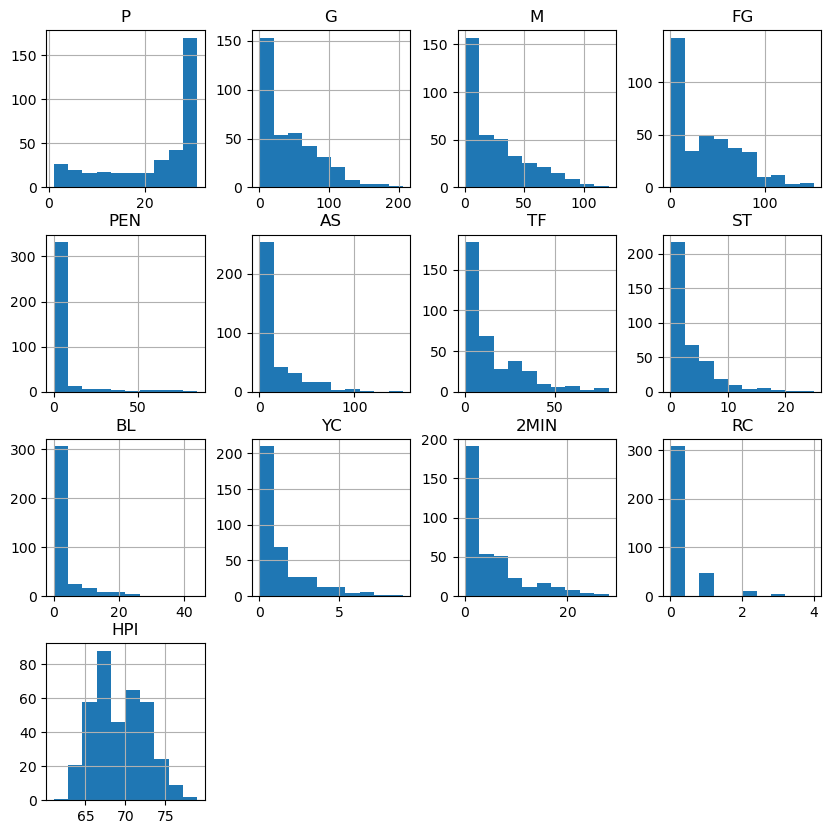

In [9]:
df.hist(bins=10, figsize=(10,10))
plt.show()

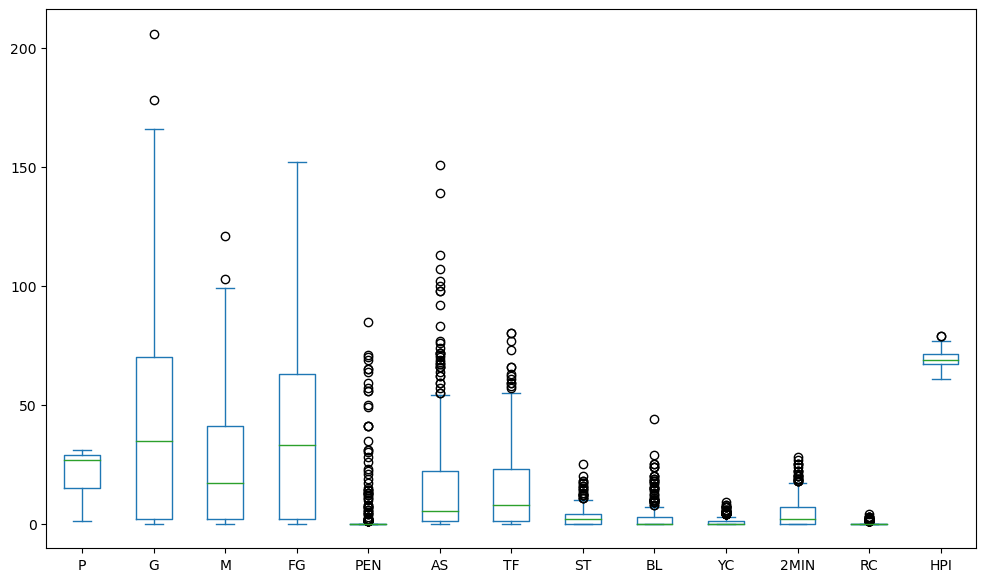

In [10]:
df.plot(kind='box', figsize=(12,7))
plt.show()

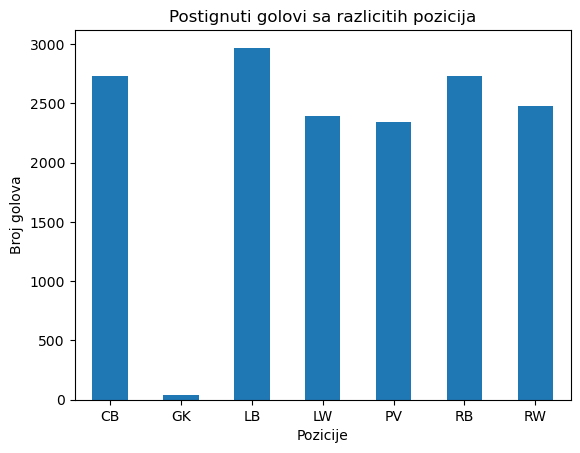

In [11]:
df.groupby('POSITION').sum()['G'].plot(kind='bar')
plt.title('Postignuti golovi sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj golova')
plt.xticks(rotation=0)
plt.show()

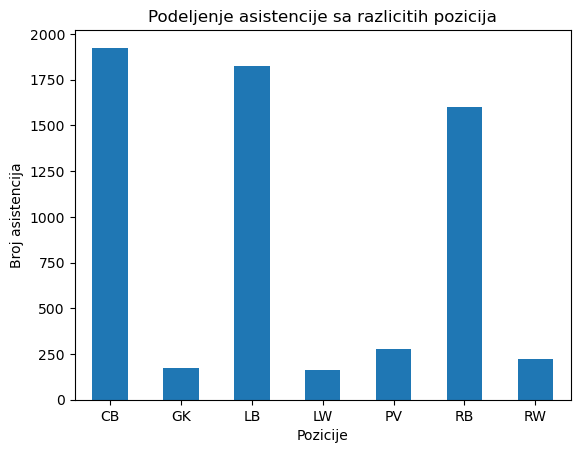

In [12]:
df.groupby('POSITION').sum()['AS'].plot(kind='bar')
plt.title('Podeljenje asistencije sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj asistencija')
plt.xticks(rotation=0)
plt.show()

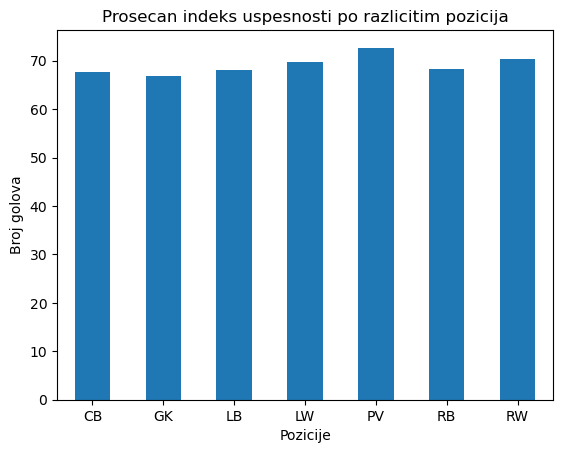

In [13]:
df.groupby('POSITION').mean()['HPI'].plot(kind='bar')
plt.title('Prosecan indeks uspesnosti po razlicitim pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj golova')
plt.xticks(rotation=0)
plt.show()

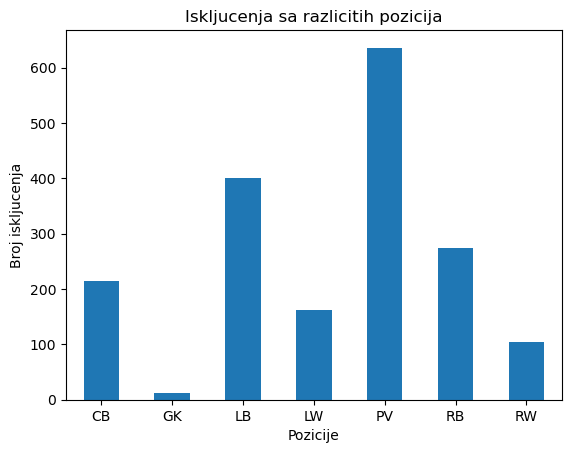

In [14]:
df.groupby('POSITION').sum()['2MIN'].plot(kind='bar')
plt.title('Iskljucenja sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj iskljucenja')
plt.xticks(rotation=0)
plt.show()

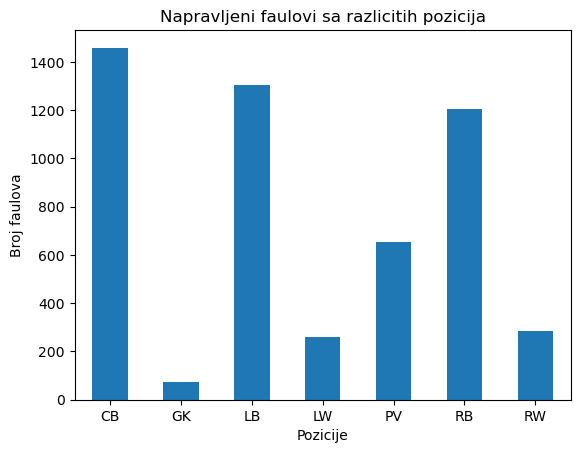

In [15]:
df.groupby('POSITION').sum()['TF'].plot(kind='bar')
plt.title('Napravljeni faulovi sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj faulova')
plt.xticks(rotation=0)
plt.show()

In [17]:
df=df.drop('CLUB', axis=1)

In [19]:
df=df.join(pd.get_dummies(df.POSITION))

In [21]:
df=df.drop('POSITION', axis=1)

# DBSCAN

In [22]:
from scipy.spatial import distance_matrix
dist_matrix=distance_matrix(df.values, df.values)
dist_matrix=pd.DataFrame(dist_matrix, index=df.index, columns=df.index)
dist_matrix.head()

NAME,"Mortensen, Casper Ulrich","Knorr, Juri","Steinert, Christoph","Blohme, Lukas","Smits, Kay","Jakobsen, Emil","Kristjansson, Gisli Thorgeir","Rubin, Lenny","Kristjánsson, Viggó","Lindberg, Hans",...,"Fenske, Fabio Justin","Depping, Luc","Bones, Paul","El-Tayar, Mohamed Essam Moustafa","Pinski, Alexander","Niemann, Max","Teuteberg, Theodor","Overby, Silas","Unbehaun, Levin","Abt, Valentin"
NAME,,,,,,,,,,,,,,,,,,,,,
"Mortensen, Casper Ulrich",0.000000,118.182063,80.541915,73.006849,71.154761,66.678332,138.383525,115.342967,120.635816,114.939114,...,272.631620,272.574760,272.690301,271.414812,272.622450,272.554582,272.620616,272.429807,272.516055,272.937722
"Knorr, Juri",118.182063,0.000000,86.994253,130.203687,87.304066,128.495136,89.269256,103.860483,73.171033,154.531550,...,276.400072,276.231787,276.316847,274.136827,276.492315,276.201014,276.537520,276.059776,276.499548,276.795954
"Steinert, Christoph",80.541915,86.994253,0.000000,107.680082,33.166248,70.562029,128.604043,115.814507,58.872744,78.025637,...,227.940782,227.784986,227.861800,225.816297,227.859606,227.712538,227.910070,227.571967,227.850828,228.245482
"Blohme, Lukas",73.006849,130.203687,107.680082,0.000000,81.639451,58.940648,101.133575,77.678826,116.871725,116.803253,...,238.079819,237.968485,238.054616,236.393739,237.968485,237.903342,237.995798,237.777207,237.913850,238.346387
"Smits, Kay",71.154761,87.304066,33.166248,81.639451,0.000000,47.989582,105.456152,101.847926,56.603887,72.787362,...,220.732870,220.540246,220.705686,218.579505,220.671702,220.542513,220.705686,220.329299,220.617316,221.079171


In [23]:
four_dist=[]
labels=[]
for i in range(len(dist_matrix)):
    four_dist.append(round(dist_matrix.iloc[i,:].nsmallest(4).iloc[-1], 2))
    labels.append(dist_matrix.index[i])

In [35]:
df_four_dist=pd.DataFrame({'Four_dist':four_dist, 'Player': labels})
df_four_dist=df_four_dist.sort_values(by='Four_dist', ascending=False)
df_four_dist=df_four_dist.reset_index()
df_four_dist=df_four_dist.drop('index', axis=1)
df_four_dist

,Four_dist,Player
0,89.52,"Michalczik, Marian"
1,87.30,"Knorr, Juri"
2,73.01,"Mortensen, Casper Ulrich"
3,70.56,"Steinert, Christoph"
4,69.63,"Blohme, Lukas"
...,...,...
367,2.00,"Abt, Valentin"
368,1.73,"Goldbecker, Leon"
369,1.73,"Haßferter, Michael"
370,1.41,"Behrendt, Niclas"


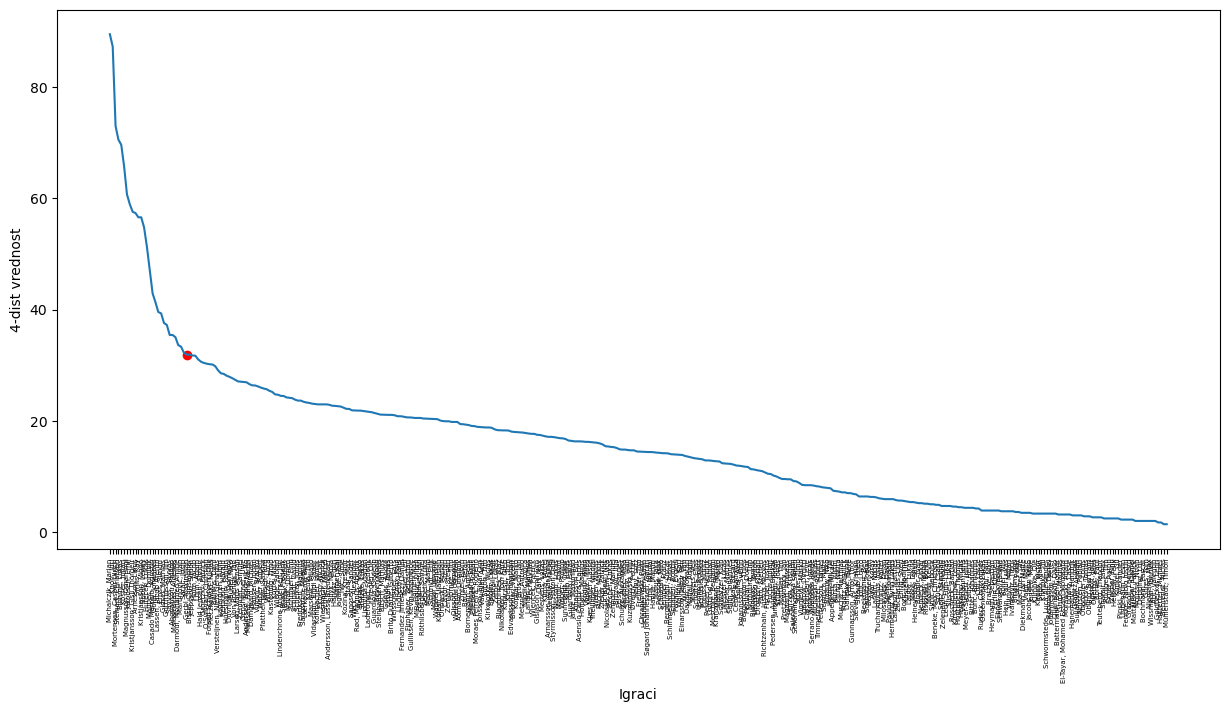

In [38]:
plt.figure(figsize=(15,7))
plt.plot(df_four_dist.Four_dist)
plt.scatter(27,31.91, color='red')
plt.xlabel('Igraci')
plt.ylabel('4-dist vrednost')
plt.xticks(list(range(372)), df_four_dist.Player, rotation=90, fontsize=5)
plt.show()

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
model=DBSCAN(min_samples=4, eps=31.91)
labels=model.fit_predict(df)

In [41]:
np.unique(labels)

array([-1,  0], dtype=int64)